# Preocessing on Large_VC_Dataset

Skipping valid, labels folder not found.
Total number of classes: 7

Sample images for each class:



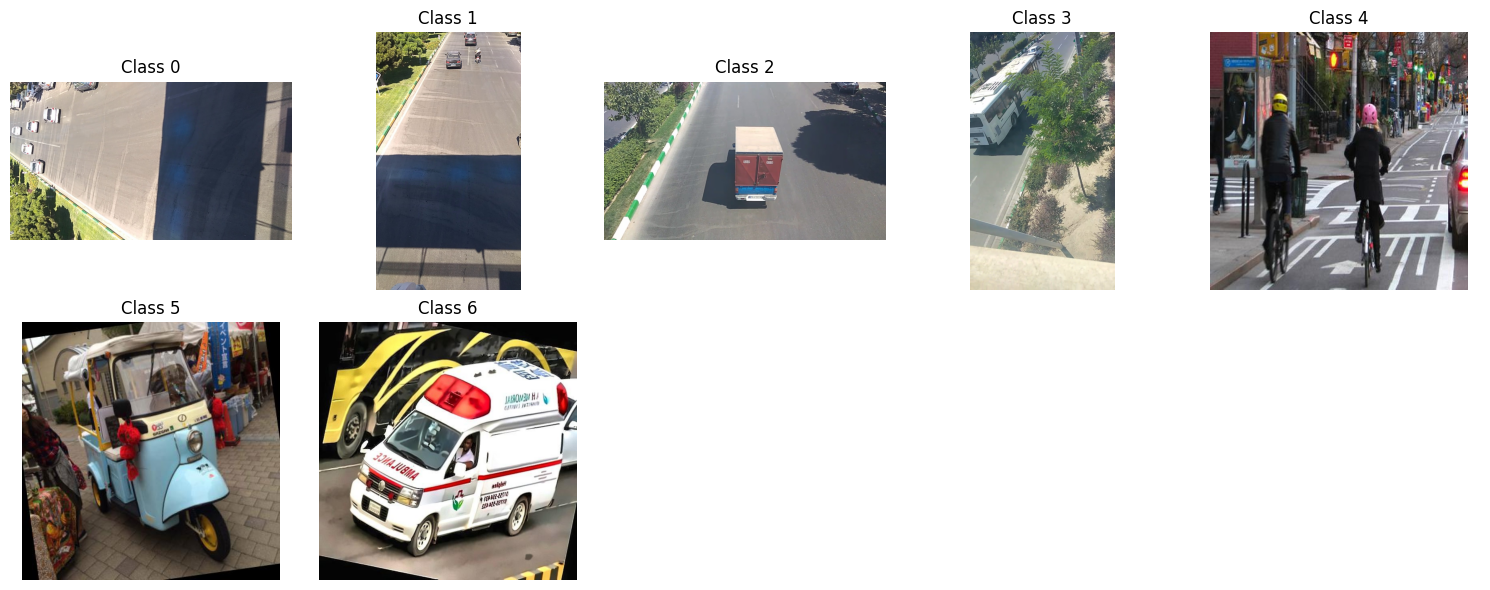

In [2]:
import os
from collections import defaultdict
from PIL import Image as PILImage
import matplotlib.pyplot as plt

# Path to your dataset root folder
dataset_path = 'C:\\Users\\ADMIN\\Desktop\\Project_ANPR\\New Dataset\\dataset-vehicles'

# Dictionary to store class-wise image names
class_to_images = defaultdict(list)
all_classes = set()

# Loop over each subfolder (train, test, valid)
for split in ['train', 'test', 'valid']:
    image_folder = os.path.join(dataset_path, split, 'images')
    label_folder = os.path.join(dataset_path, split, 'labels')

    if not os.path.exists(label_folder):
        print(f"Skipping {split}, labels folder not found.")
        continue

    # Iterate through label files
    for label_file in os.listdir(label_folder):
        if not label_file.endswith('.txt'):
            continue
        label_path = os.path.join(label_folder, label_file)
        image_name = os.path.splitext(label_file)[0] + '.jpg'  # Assuming images are in .jpg

        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 0:  # Skip empty lines
                    continue
                class_id = parts[0]  # Extract class ID
                class_to_images[class_id].append(os.path.join(dataset_path, split, 'images', image_name))
                all_classes.add(class_id)

# Display total classes and one image per class
print(f"Total number of classes: {len(all_classes)}\n")
print("Sample images for each class:\n")

# Define number of columns
num_cols = 5  # Change this to adjust how many images per row
num_classes = len(class_to_images)
num_rows = (num_classes // num_cols) + (num_classes % num_cols > 0)  # Calculate rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))  # Adjust figure size

# Flatten axes array in case of a single row
axes = axes.flatten()

for idx, class_id in enumerate(sorted(class_to_images)):
    try:
        if class_to_images[class_id]:  # Ensure class has at least one image
            sample_image_path = class_to_images[class_id][5]
            img = PILImage.open(sample_image_path)

            axes[idx].imshow(img)
            axes[idx].axis('off')
            axes[idx].set_title(f"Class {class_id}")

    except Exception as e:
        print(f"Error displaying image for Class {class_id}: {e}")

# Hide unused subplots
for i in range(idx + 1, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Skipping valid, labels folder not found.
Total unique images in dataset: 2115

Unique images per class:
Class 5: 381 images
Class 0: 733 images
Class 1: 160 images
Class 3: 139 images
Class 2: 94 images
Class 4: 54 images
Class 6: 710 images


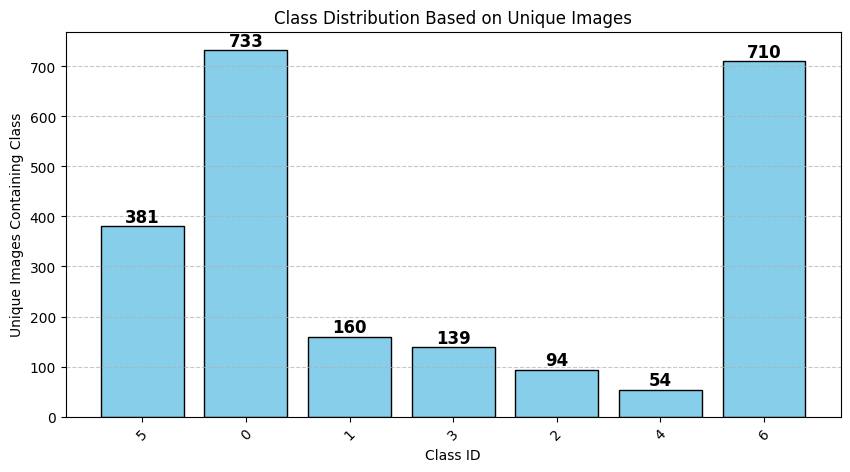

In [3]:
import os
from collections import defaultdict
import matplotlib.pyplot as plt

# Path to your dataset root folder
dataset_path = 'C:\\Users\\ADMIN\\Desktop\\Project_ANPR\\New Dataset\\dataset-vehicles'

# Dictionary to store class-wise image counts
class_image_counts = defaultdict(set)  # Use a set to avoid duplicate counting
all_classes = set()
total_images = set()  # To track unique images in the dataset

# Loop over each subfolder (train, test, valid)
for split in ['train', 'test', 'valid']:
    label_folder = os.path.join(dataset_path, split, 'labels')
    image_folder = os.path.join(dataset_path, split, 'images')

    if not os.path.exists(label_folder):
        print(f"Skipping {split}, labels folder not found.")
        continue

    # Iterate through label files
    for label_file in os.listdir(label_folder):
        if not label_file.endswith('.txt'):
            continue
        label_path = os.path.join(label_folder, label_file)
        image_name = os.path.splitext(label_file)[0] + '.jpg'  # Assuming images are in .jpg
        image_path = os.path.join(image_folder, image_name)

        if not os.path.exists(image_path):  
            continue  # Skip if image does not exist

        total_images.add(image_path)  # Count unique images

        with open(label_path, 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.strip().split()
                if len(parts) == 0:  # Skip empty lines
                    continue
                class_id = parts[0]  # Extract class ID
                
                # Count unique images per class
                class_image_counts[class_id].add(image_path)
                all_classes.add(class_id)

# Convert sets to counts
class_image_counts = {k: len(v) for k, v in class_image_counts.items()}

# Display class-wise image counts
print(f"Total unique images in dataset: {len(total_images)}\n")
print("Unique images per class:")
for class_id, count in class_image_counts.items():
    print(f"Class {class_id}: {count} images")

# Plot bar chart for class distribution
plt.figure(figsize=(10, 5))
bars = plt.bar(class_image_counts.keys(), class_image_counts.values(), color='skyblue', edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel("Class ID")
plt.ylabel("Unique Images Containing Class")
plt.title("Class Distribution Based on Unique Images")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
